In [1]:
import torch

from scalarize.utils.scalarization_functions import ChebyshevScalarization
from scalarize.utils.scalarization_objectives import flatten_scalarized_objective
from scalarize.utils.scalarization_parameters import SimplexWeightScale, UnitVectorPolar

from plot_segments import (
    greedy_algorithm,
    plot_all_segments_mc,
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
M = 2
num_weights = 2000
num_points = 1000

t = torch.linspace(0.001, 0.999, num_points)
xt = torch.cos(t * torch.pi / 2)
yt = torch.sin(t * torch.pi / 2)
pf = torch.column_stack([xt, yt])

latent_w = torch.linspace(0.001, 0.999, num_weights).unsqueeze(-1)
w = SimplexWeightScale.transform(latent_w)
h = UnitVectorPolar.transform(latent_w)

utopia = torch.ones(1, M)
nadir = torch.zeros(1, M)

### Changing the number of Monte Carlo samples

In [3]:
s_fn = ChebyshevScalarization(weights=w, ref_points=utopia)
s_pf = flatten_scalarized_objective(Y=pf.unsqueeze(-2), scalarization_fn=s_fn)

num_iterations = 10
torch.manual_seed(123)
scalarized_obj_list_g1, indices_g1 = greedy_algorithm(
    s_pf, num_iterations, num_weights=1
)
scalarized_obj_list_g5, indices_g5 = greedy_algorithm(
    s_pf, num_iterations, num_weights=5
)
scalarized_obj_list_g10, indices_g10 = greedy_algorithm(
    s_pf, num_iterations, num_weights=10
)
scalarized_obj_list_g25, indices_g25 = greedy_algorithm(
    s_pf, num_iterations, num_weights=25
)
scalarized_obj_list_g50, indices_g50 = greedy_algorithm(
    s_pf, num_iterations, num_weights=50
)
scalarized_obj_list_g100, indices_g100 = greedy_algorithm(
    s_pf, num_iterations, num_weights=100
)
scalarized_obj_list_g500, indices_g500 = greedy_algorithm(
    s_pf, num_iterations, num_weights=500
)
scalarized_obj_list_g1000, indices_g1000 = greedy_algorithm(
    s_pf, num_iterations, num_weights=1000
)
scalarized_obj_list_g2000, indices_g2000 = greedy_algorithm(
    s_pf, num_iterations, num_weights=2000
)

In [4]:
scalarized_obj_list = [
    scalarized_obj_list_g1,
    scalarized_obj_list_g5,
    scalarized_obj_list_g10,
    scalarized_obj_list_g25,
    scalarized_obj_list_g50,
    scalarized_obj_list_g100,
    scalarized_obj_list_g1000,
    scalarized_obj_list_g2000,
]
num_samples = [1, 5, 10, 25, 50, 100, 1000, 2000]

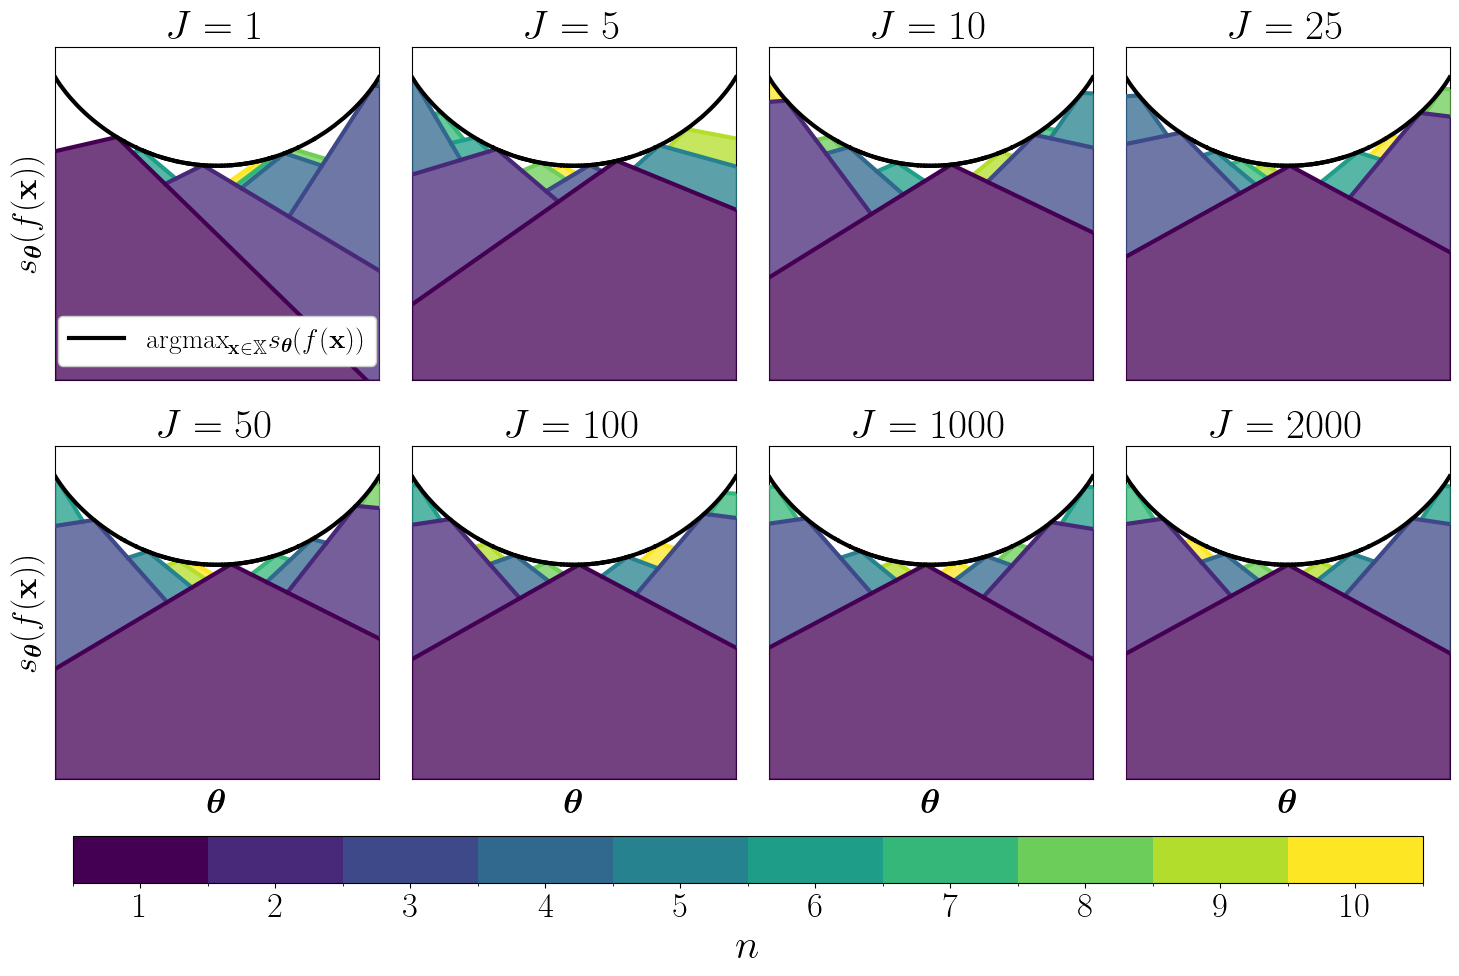

In [5]:
fig = plot_all_segments_mc(
    num_iterations=num_iterations,
    weights=latent_w.squeeze(-1),
    all_scalarized_objective=s_pf,
    scalarized_objectives_list=scalarized_obj_list,
    num_samples=num_samples,
    lower_bound=-0.5,
    upper_bound=0.05,
)